In [1]:
import numpy as np
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
# Load the dataset
train_df = pd.read_csv("Titanic_train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("Dataset Info:")
print(train_df.info())
print("\nMissing values:")
print(train_df.isnull().sum())
print("\nDescriptive Statistics:")
print(train_df.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687

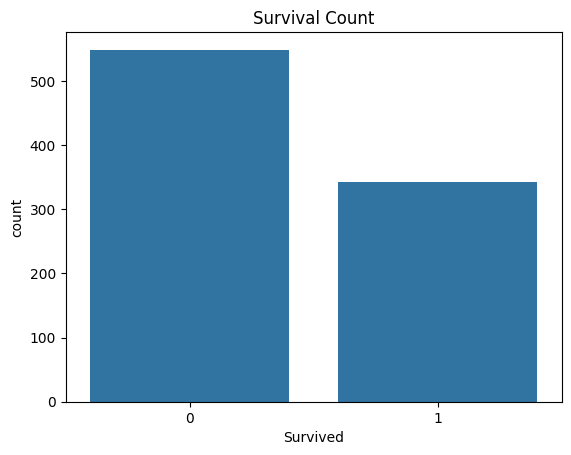

In [5]:
import seaborn as sns
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()


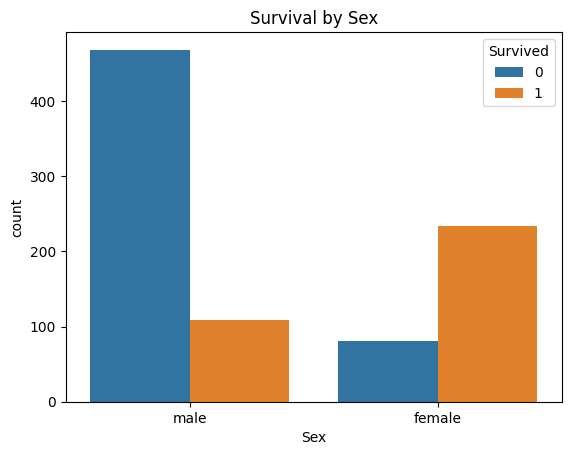

In [6]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

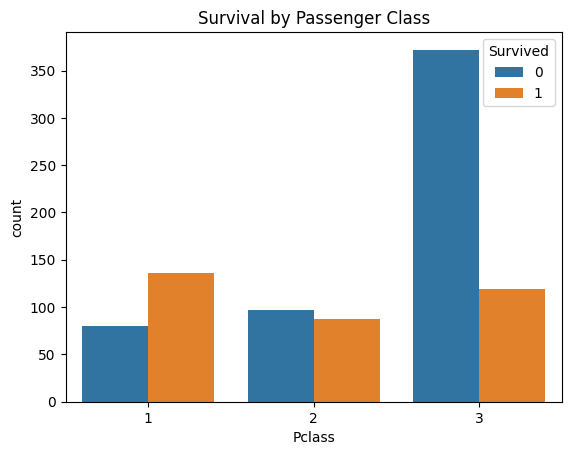

In [7]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()


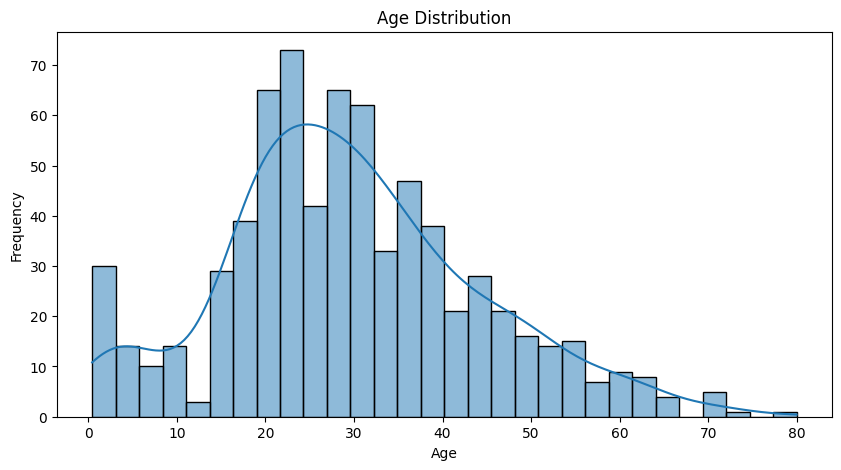

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

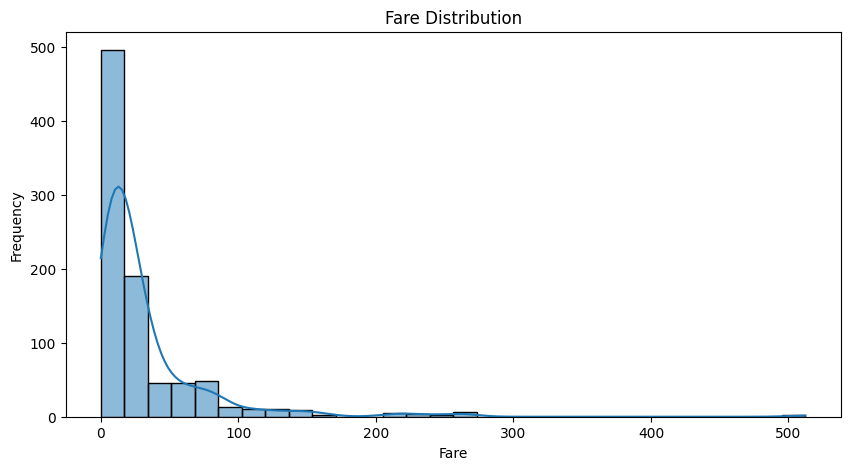

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


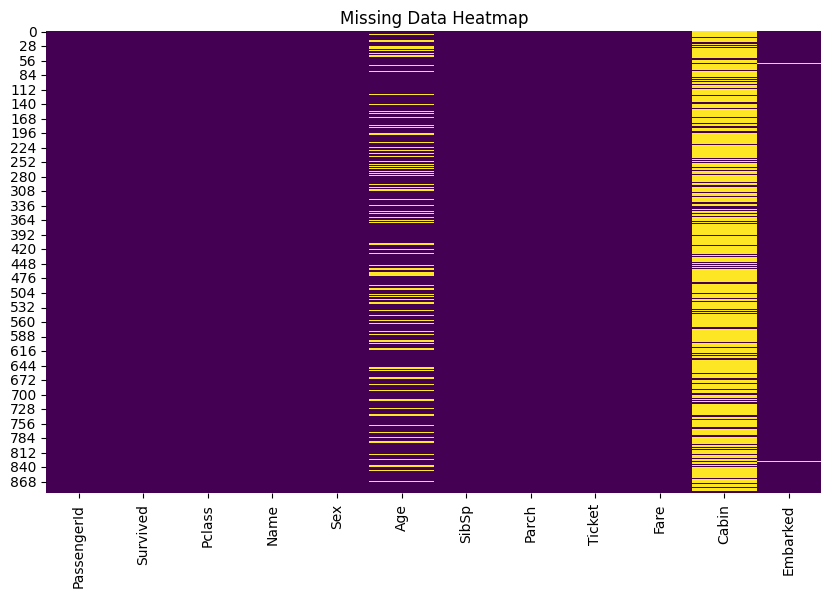

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

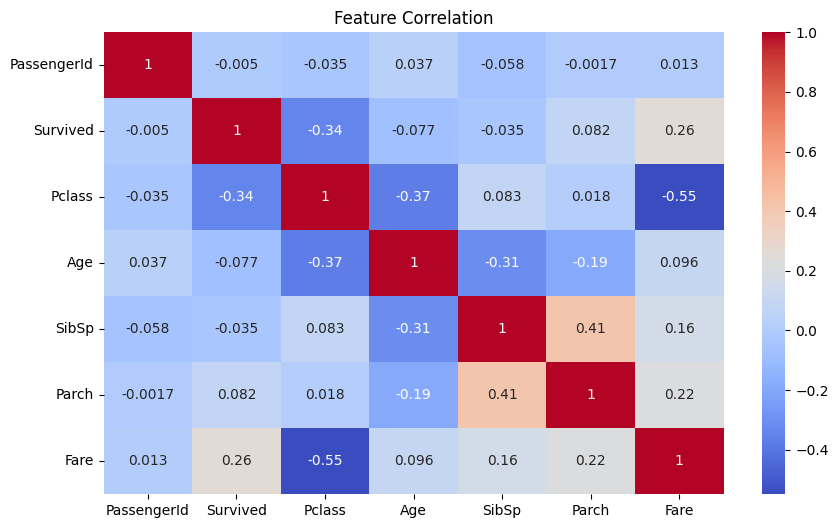

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [13]:
print("Feature Types:\n")
print(train_df.dtypes)

Feature Types:

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [14]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

In [15]:
print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [17]:
print("\nSummary Statistics - Numerical:\n")
print(train_df[numerical_features].describe())


Summary Statistics - Numerical:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [19]:
print("\nSummary Statistics - Categorical:\n")
print(train_df[categorical_features].describe())


Summary Statistics - Categorical:

                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


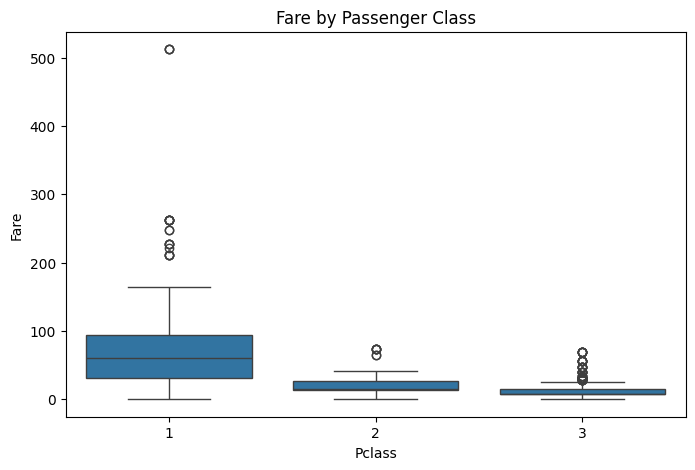

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='Pclass', y='Fare')
plt.title("Fare by Passenger Class")
plt.show()

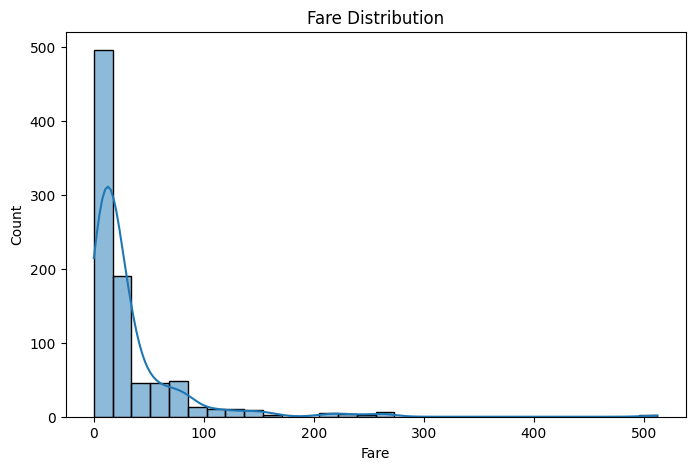

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='Fare', bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

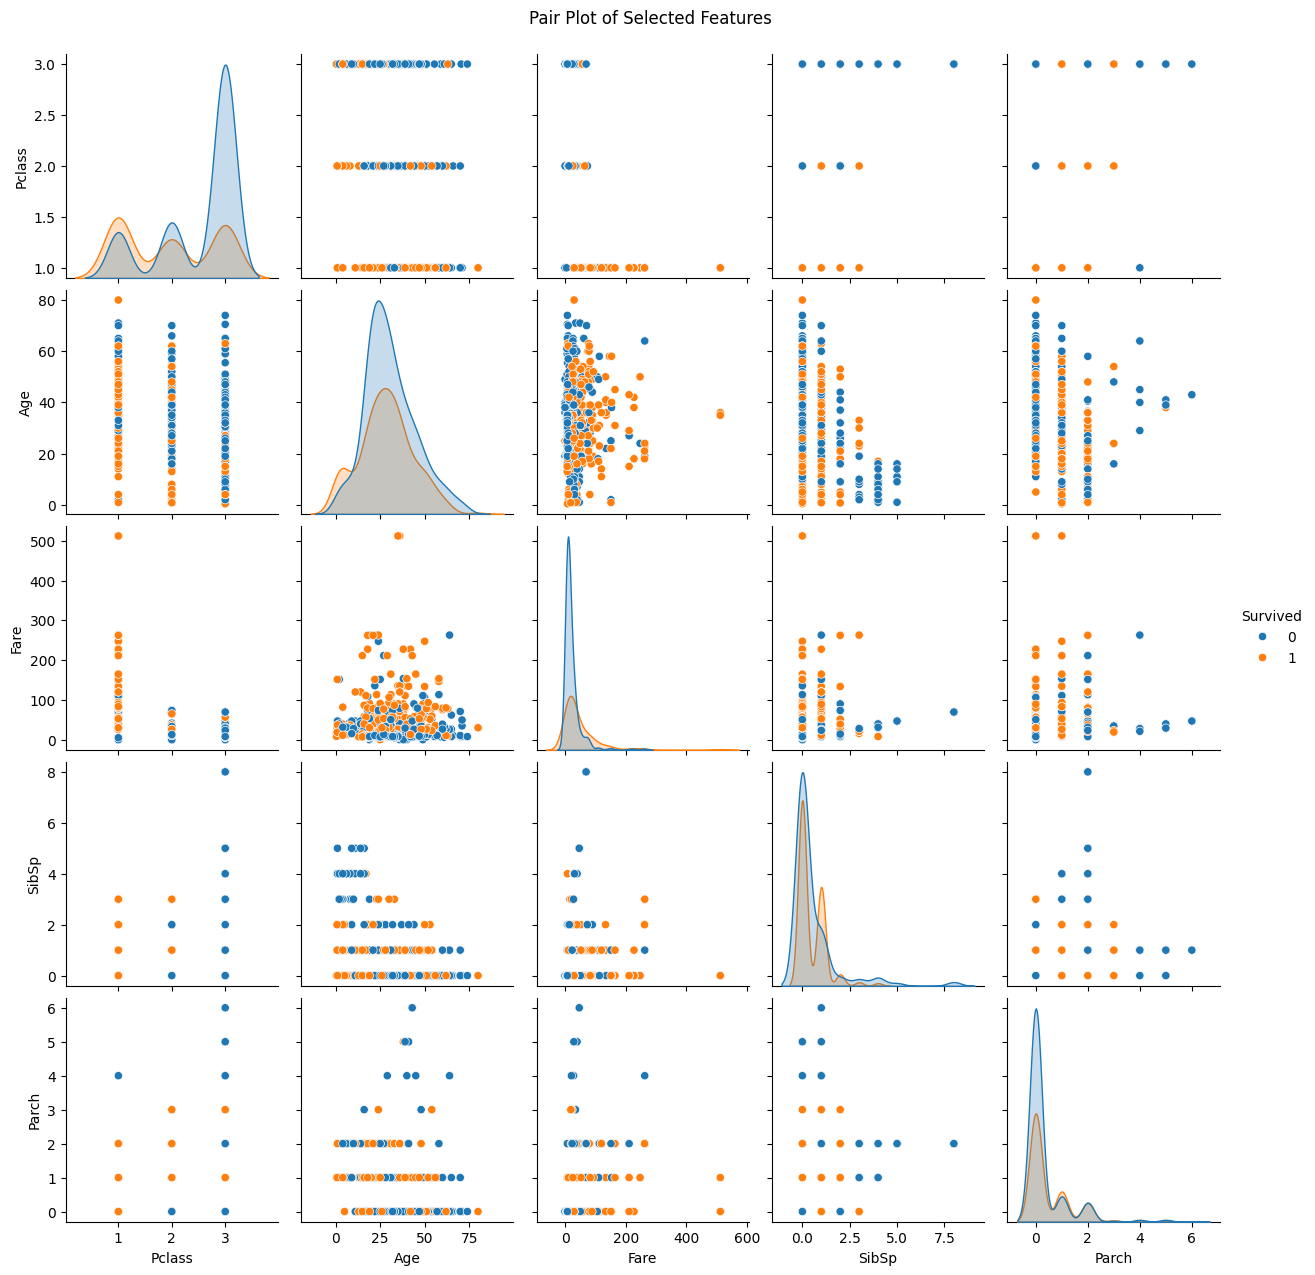

In [22]:
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

Based on the Titanic dataset and the visualizations from the earlier EDA, here are some key patterns and correlations observed:

Females had a much higher survival rate than males.

Passengers in 1st class had significantly higher survival rates.

Age distribution is right-skewed (more younger people).

Children (especially below ~10) had relatively higher survival rates.

Median age is around 28–30 years.

Strongest correlation:

Pclass is negatively correlated with Fare and Survived

Fare is positively correlated with Survived

Age has little to no strong correlation with survival numerically but shows patterns when analyzed categorically.

In [23]:
# 1. Fill missing 'Age' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# 2. Fill missing 'Embarked' with mode (most common port)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# 3. Drop 'Cabin' column due to excessive missing values
train_df.drop(columns=['Cabin'], inplace=True)

# 4. Check if 'Fare' has missing values and fill if needed
if train_df['Fare'].isnull().sum() > 0:
    train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# 5. Verify no missing values remain
print("Missing values after imputation:\n")
print(train_df.isnull().sum())

Missing values after imputation:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-23-4de4281b1952>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-23-4de4281b1952>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [25]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

#  One-Hot Encode 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')

# Preview the encoded dataset
print("Encoded DataFrame Preview:\n")
print(train_df.head())

Encoded DataFrame Preview:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False       False        True  
1          PC 17599  71.2833        True       False       False  
2  STON/O2. 3101282   7.9250       False       False        True  


In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Load datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")
# Backup PassengerId from test set for final output
test_passenger_ids = test_df['PassengerId']
# -------------------------------
# Preprocessing Function (shared)
# -------------------------------
def preprocess(df):
    df = df.copy()

    # Fill missing Age with median
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Fill missing Fare with median (test set might have it)
    if 'Fare' in df.columns:
        df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Fill missing Embarked with mode
    if 'Embarked' in df.columns:
        df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Drop Cabin, Ticket, Name
    df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

    # Encode 'Sex'
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    # One-hot encode Embarked
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

    return df

# Preprocess both datasets
train_df = preprocess(train_df)
test_df = preprocess(test_df)

# Align columns (test set might be missing dummy columns)
X = train_df.drop(columns=['Survived', 'PassengerId'])
y = train_df['Survived']

# Add missing columns to test set (if any)
missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Ensure order of columns matches
X_test = test_df[X.columns]

# -------------------------------
# Scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Train Logistic Regression
# -------------------------------
model = LogisticRegression()
model.fit(X_scaled, y)

# -------------------------------
# Predict on Test Set
# -------------------------------
y_pred_test = model.predict(X_test_scaled)

# -------------------------------
# Output Predictions
# -------------------------------
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': y_pred_test
})

print(submission.head())



   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


<ipython-input-26-09d35c432ce8>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-26-09d35c432ce8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [27]:
model = LogisticRegression()
model.fit(X_scaled, y)


LogisticRegression()

<ipython-input-29-d7227e57f448>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-29-d7227e57f448>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.881981981981982


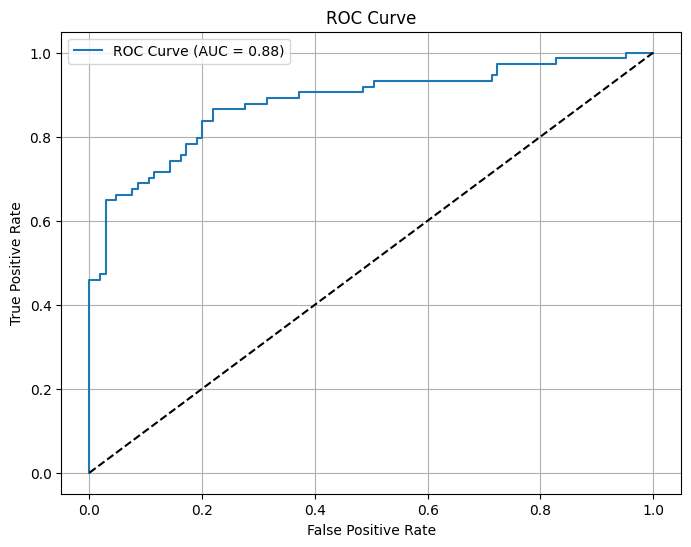

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load training data
df = pd.read_csv("Titanic_train.csv")

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Features and target
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Split into train and test sets (this gives you y_test!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Create a DataFrame of coefficients with their feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value for easier interpretation
coefficients['abs_coef'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='abs_coef', ascending=False, inplace=True)
coefficients.drop(columns='abs_coef', inplace=True)

print(coefficients)


      Feature  Coefficient
1         Sex     1.277585
0      Pclass    -0.784897
2         Age    -0.395961
3       SibSp    -0.349279
5        Fare     0.125920
4       Parch    -0.096550
6  Embarked_C     0.089554
8  Embarked_S    -0.088740
7  Embarked_Q     0.017445


Key Features & Their Significance

Most important feature.

Coefficient is strongly negative for male, indicating that:

Males had significantly lower survival probability than females.

Reflects real-world priority of "women and children first" during the evacuation.


Pclass (Passenger Class)
Lower class number = higher socioeconomic status:

Pclass = 1 (1st class) → More likely to survive.

Pclass = 3 (3rd class) → Lower chance of survival.

Higher classes were closer to lifeboats and given higher priority.


Higher fare often correlates with higher class or better cabins.

Positive coefficient → Higher fare → Slightly increased chance of survival.



Precision focuses on the accuracy of positive predictions (how many of the predicted positives are actually positive). Recall focuses on the ability to identify all actual positive cases (how many of the actual positives were detected by the model).

High Precision: Few false positives. High Recall: Few false negatives.

Cross-validation is a technique used to assess the performance of a machine learning model by splitting the data into multiple subsets (or folds) and training the model on different combinations of these subsets. The primary goal of cross-validation is to evaluate how well the model generalizes to unseen data, helping to prevent overfitting and provide a more reliable estimate of model performance.

Avoiding Overfitting: Cross-validation helps assess the model’s ability to generalize to unseen data by using different training and validation sets for each fold. This reduces the risk of overfitting to a single training set.

Reliable Estimate of Model Performance: It provides a more robust and reliable estimate of the model’s performance compared to using a single train-test split. By averaging results from multiple test sets, cross-validation gives a better idea of how the model will perform on new, unseen data.

Better Use of Data: In smaller datasets, cross-validation ensures that all data points are used for both training and validation. This is particularly important when the dataset is limited and you want to make the best use of the available data.

Hyperparameter Tuning: Cross-validation is often used in conjunction with hyperparameter tuning (e.g., grid search) to optimize the model parameters while assessing performance consistently across different subsets of data.

Dealing with Imbalanced Data: In binary classification, if one class is much more common than the other (class imbalance), cross-validation ensures that both classes are represented in both training and validation sets across different folds. This helps prevent biased performance evaluation.